# IncomeRatio

----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import scipy.stats as st
import numpy as np
import gmaps
from census import Census

# Census API Key
from api_keys import api_key
c = Census(api_key, year=2018)


In [2]:
# Read in the csv containing reduced data
five_year_data_df = pd.read_csv('five_year_data.csv')
five_year_data_df.head()


,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc,Name,Population,Median Age,Household Income,Unemployment Rate,Latitude,Longitude
0,308459.500000,316272.750000,319276.000000,332741.750000,332180.500000,0.074364,AK,738516.0,34.0,76715.0,3.800459,64.0685,-152.2782
1,112818.809524,116453.809524,122060.904762,127214.428571,135227.476190,0.190491,AL,4864680.0,38.9,48486.0,3.040241,32.7794,-86.8287
2,91220.900000,94984.800000,98921.950000,103107.400000,106684.900000,0.165465,AR,2990671.0,37.9,45726.0,2.533679,34.8938,-92.4426
3,191720.181818,203693.090909,217927.636364,230183.272727,248400.000000,0.295034,AZ,6946685.0,37.4,56213.0,3.026105,34.2744,-111.6602
4,396921.454545,421064.264706,452449.382353,452734.352941,480126.794118,0.230878,CA,39148760.0,36.3,71228.0,3.375591,37.1841,-119.4696


In [3]:
#Rename columns to state instead of name
five_year_data_df.rename(columns = {'Name':'State'}, inplace = True) 
five_year_data_df.head()
                                    

,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc,State,Population,Median Age,Household Income,Unemployment Rate,Latitude,Longitude
0,308459.500000,316272.750000,319276.000000,332741.750000,332180.500000,0.074364,AK,738516.0,34.0,76715.0,3.800459,64.0685,-152.2782
1,112818.809524,116453.809524,122060.904762,127214.428571,135227.476190,0.190491,AL,4864680.0,38.9,48486.0,3.040241,32.7794,-86.8287
2,91220.900000,94984.800000,98921.950000,103107.400000,106684.900000,0.165465,AR,2990671.0,37.9,45726.0,2.533679,34.8938,-92.4426
3,191720.181818,203693.090909,217927.636364,230183.272727,248400.000000,0.295034,AZ,6946685.0,37.4,56213.0,3.026105,34.2744,-111.6602
4,396921.454545,421064.264706,452449.382353,452734.352941,480126.794118,0.230878,CA,39148760.0,36.3,71228.0,3.375591,37.1841,-119.4696


In [4]:
# calculate income ratio

income_ratio = five_year_data_df['9/30/2018']/five_year_data_df['Household Income']
income_ratio


0     4.161846
1     2.517446
2     2.163363
3     3.876819
4     6.352128
5     5.781005
6     3.937361
7     5.232931
8     3.582192
9     4.086563
10    2.287793
11    7.928103
12    2.426084
13    4.796364
14    1.718879
15    2.277258
16    2.082097
17    2.492641
18    2.797978
19    5.090524
20    2.714431
21    3.522309
22    2.545033
23    2.743754
24    2.387607
25    2.518280
26    5.225265
27    3.074047
28    3.331257
29    2.513107
30    3.050580
31    3.005330
32    3.315118
33    5.116586
34    2.321677
35    2.186726
36    1.909799
37    4.708509
38    2.368001
39    5.013713
40    3.163812
41    3.169139
42    2.740831
43    2.348532
44    5.013303
45    2.562848
46    3.992788
47    4.183588
48    2.716466
49    2.104472
50    4.353836
dtype: float64

In [5]:
# append ratio to the dataset
five_year_data_df['Income Ratio'] = income_ratio
five_year_data_df

,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc,State,Population,Median Age,Household Income,Unemployment Rate,Latitude,Longitude,Income Ratio
0,308459.500000,316272.750000,319276.000000,332741.750000,332180.500000,0.074364,AK,738516.0,34.0,76715.0,3.800459,64.0685,-152.2782,4.161846
1,112818.809524,116453.809524,122060.904762,127214.428571,135227.476190,0.190491,AL,4864680.0,38.9,48486.0,3.040241,32.7794,-86.8287,2.517446
2,91220.900000,94984.800000,98921.950000,103107.400000,106684.900000,0.165465,AR,2990671.0,37.9,45726.0,2.533679,34.8938,-92.4426,2.163363
3,191720.181818,203693.090909,217927.636364,230183.272727,248400.000000,0.295034,AZ,6946685.0,37.4,56213.0,3.026105,34.2744,-111.6602,3.876819
4,396921.454545,421064.264706,452449.382353,452734.352941,480126.794118,0.230878,CA,39148760.0,36.3,71228.0,3.375591,37.1841,-119.4696,6.352128
5,348916.352941,372094.176471,397796.705882,414621.000000,427329.941176,0.233738,CO,5531141.0,36.6,68811.0,2.518938,38.9972,-105.5478,5.781005
6,284310.400000,294524.200000,299656.800000,300244.800000,317361.600000,0.126812,CT,3581504.0,40.8,76106.0,3.515534,41.6219,-72.7273,3.937361
7,402366.000000,417469.000000,432261.000000,443640.000000,469854.000000,0.167728,DC,684498.0,33.9,82604.0,4.291174,38.9101,-77.0147,5.232931
8,218475.000000,224679.500000,235088.500000,243079.000000,256360.500000,0.174148,DE,949495.0,40.2,65627.0,3.001701,38.9896,-75.5050,3.582192
9,193960.965517,205772.206897,217678.931034,225917.931034,238672.206897,0.261734,FL,20598139.0,41.9,53267.0,3.024438,28.6305,-82.4497,4.086563


In [6]:
# clean up data frame

clean_income_ratio = five_year_data_df.drop(['Unemployment Rate', 'Latitude', 'Longitude', 'Unemployment Rate'], axis=1)


# Save the updated dataframe as a csv
clean_income_ratio.to_csv("clean_income_ratio.csv", encoding="utf-8", index=False)

In [7]:
sorted_ratio_df = clean_income_ratio.sort_values(by=['Income Ratio'], ascending=True)
sorted_ratio_df

,9/30/2016,9/30/2017,9/30/2018,9/30/2019,9/30/2020,% of Inc,State,Population,Median Age,Household Income,Income Ratio
14,103386.777778,106452.592593,109277.740741,112247.629630,113626.037037,0.096396,IL,12821497.0,37.9,63575.0,1.718879
36,92457.761905,94891.952381,98209.523810,101508.666667,105705.333333,0.142288,OK,3918137.0,36.4,51424.0,1.909799
16,112077.650000,115552.600000,119558.150000,123900.200000,127267.500000,0.126024,KS,2908776.0,36.5,57422.0,2.082097
49,89011.909091,91489.909091,94535.000000,98022.454545,99730.636364,0.120087,WV,1829054.0,42.4,44921.0,2.104472
2,91220.900000,94984.800000,98921.950000,103107.400000,106684.900000,0.165465,AR,2990671.0,37.9,45726.0,2.163363
35,106253.177778,112307.155556,119248.711111,126287.577778,131578.088889,0.234734,OH,11641879.0,39.3,54533.0,2.186726
15,109792.055556,115751.305556,123712.055556,131135.305556,136857.027778,0.241702,IN,6637426.0,37.6,54325.0,2.277258
10,113790.000000,119690.189189,127382.000000,134004.405405,138038.972973,0.205800,GA,10297484.0,36.5,55679.0,2.287793
34,139171.692308,144555.576923,151658.884615,157067.230769,163900.192308,0.175523,NY,19618453.0,38.7,65323.0,2.321677
43,125475.560606,132658.363636,139902.029412,146208.088235,149517.294118,0.189343,TX,27885195.0,34.4,59570.0,2.348532


In [10]:
# mean house ratio
meanIR = sorted_ratio_df['Income Ratio'].mean()
meanIR

3.4413748658149133

In [ ]:
# Plot Bar full
plt.figure(figsize=(30,50))

objects = ('Illinois','Oklahoma','Kansas','West Virginia','Arkansas', 'Ohio', 'Indiana' ,'Georgia' ,'New York','Texas','Pennsylvania','Montana','Iowa','Kentucky',
           'Nebraska','Alabama','Mississippi','Michigan','Virginia','Maryland','Wisconsin','Tennessee','Minnesota','Louisiana','New Jersey','New Hampshire','North Carolina','South Carolina','South Dakota','New Mexico','North Dakota',
           'Maine','Delaware','Arizona','Connecticut','Vermont','Florida','Arkansas','Washington','Wyoming','Oregon','Idaho','Utah','Rhode Island','Massachusetts','Nevada','Montana','District of Columbia','Colorado','California','Hawaii')
y_pos = np.arange(len(objects))
performance = [1.718879131,1.90979939,2.082096583,2.104472296,2.163363294,
               2.186725673,2.277258271,2.287792525,2.321676662,2.348531634,2.368000574,
               2.38760717,2.426083988,2.492641346,2.513106999,2.517446371,2.518279891,2.545033134,
               2.562848173,2.714430547,2.716465543,2.740830562,2.743753928,2.797977703,3.00532994,
               3.050580409,3.074047494,3.163811951,3.169138955,3.31511757,3.331256991,3.522309427,
               3.582191781,3.876819176,3.937361049,3.992788301,4.086562619,4.161845793,4.183587911,
               4.353836106,4.70850942,4.796363726,5.013303302,5.013713347,5.090524069,5.116585838,
               5.225265212,5.232930609,5.781004576,6.352128129,7.928103068]

plt.barh(y_pos, performance,color='blue', align='center', alpha=1) 
plt.xticks([0,1,2,3,4,5,6,7,8],fontsize=20)
plt.yticks(y_pos, objects, fontsize=20)
plt.xlabel('Income Ratio',fontsize=20)
plt.title('Average Income Ratio By State',fontsize=30)

# Save the image
plt.savefig("Images/Ratio_Total.png")

plt.show()


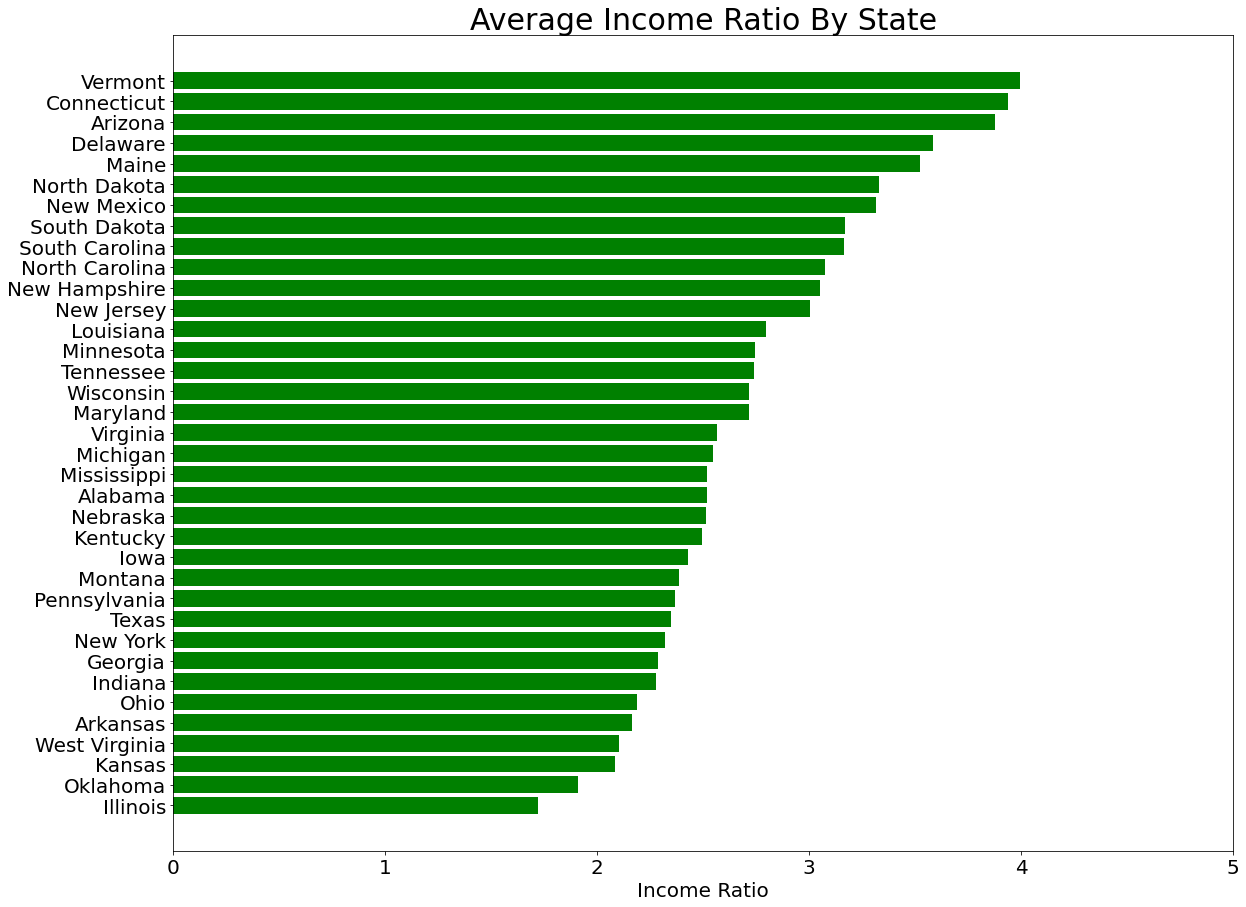

In [11]:
# Plot Bar below 4.0
plt.figure(figsize=(19,15))

objects = ('Illinois','Oklahoma','Kansas','West Virginia','Arkansas', 'Ohio', 'Indiana' ,'Georgia' ,'New York','Texas','Pennsylvania','Montana','Iowa','Kentucky',
           'Nebraska','Alabama','Mississippi','Michigan','Virginia','Maryland','Wisconsin','Tennessee','Minnesota','Louisiana','New Jersey','New Hampshire','North Carolina','South Carolina','South Dakota','New Mexico','North Dakota',
           'Maine','Delaware','Arizona','Connecticut','Vermont')
           
          
y_pos = np.arange(len(objects))
performance = [1.718879131,1.90979939,2.082096583,2.104472296,2.163363294,
               2.186725673,2.277258271,2.287792525,2.321676662,2.348531634,2.368000574,
               2.38760717,2.426083988,2.492641346,2.513106999,2.517446371,2.518279891,2.545033134,
               2.562848173,2.714430547,2.716465543,2.740830562,2.743753928,2.797977703,3.00532994,
               3.050580409,3.074047494,3.163811951,3.169138955,3.31511757,3.331256991,3.522309427,
               3.582191781,3.876819176,3.937361049,3.992788301]
               
              

plt.barh(y_pos, performance,color='green', align='center', alpha=1) 
plt.xticks([0,1,2,3,4,5],fontsize=20)
plt.yticks(y_pos, objects, fontsize=20)
plt.xlabel('Income Ratio',fontsize=20)
plt.title('Average Income Ratio By State',fontsize=30)

# Save the image
plt.savefig("Images/Ratio_Under_Four.png")

plt.show()



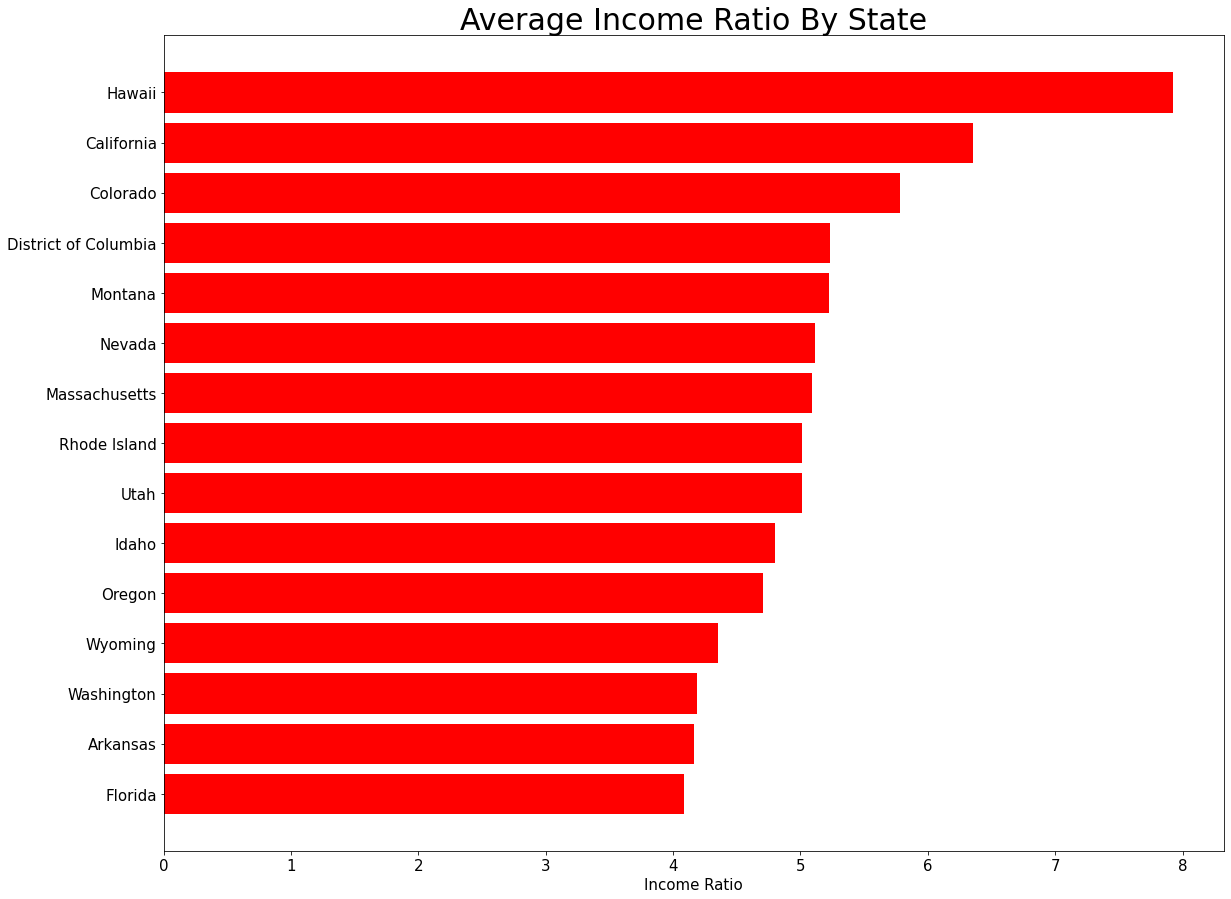

In [12]:
# Plot Bar above 4.0
plt.figure(figsize=(19,15))

objects = ('Florida','Arkansas','Washington','Wyoming','Oregon','Idaho',
           'Utah','Rhode Island','Massachusetts','Nevada','Montana','District of Columbia',
           'Colorado','California','Hawaii')

y_pos = np.arange(len(objects))
performance = [4.086562619,4.161845793,4.183587911,
               4.353836106,4.70850942,4.796363726,5.013303302,5.013713347,5.090524069,5.116585838,
               5.225265212,5.232930609,5.781004576,6.352128129,7.928103068]

plt.barh(y_pos, performance,color='red', align='center', alpha=1) 
plt.xticks([0,1,2,3,4,5,6,7,8],fontsize=15)
plt.yticks(y_pos, objects, fontsize=15)
plt.xlabel('Income Ratio',fontsize=15)
plt.title('Average Income Ratio By State',fontsize=30)

# Save the image
plt.savefig("Images/Ratio_Plus_Four.png")

plt.show()



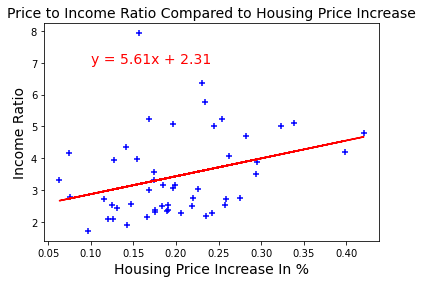

In [38]:
# scatter plot % increase in housing prices vs P/E Ratio
x_values = sorted_ratio_df['% of Inc']
y_values = sorted_ratio_df['Income Ratio']
m_slope, m_intercept, m_rvalue, m_pvalue, m_std_err = st.linregress(x_values, y_values)
regress_values = x_values * m_slope + m_intercept
line_eq = 'y = ' + str(round(m_slope,2)) + 'x + ' + str(round(m_intercept, 2))


plt.scatter(x_values, y_values,marker='+', facecolors='blue', edgecolors='black')
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0.1,7), fontsize=14, color='red')
plt.xlabel('Housing Price Increase In %', fontsize = 14)
plt.ylabel('Income Ratio' , fontsize = 14)
plt.title('Price to Income Ratio Compared to Housing Price Increase', fontsize = 14)

plt.savefig("Images/Scatter.png")
plt.show()